<ins>**Contexte**</ins> :Stack Overflow est un site célèbre de questions-réponses liées au développement informatique.



Afin de poser une question sur ce site, il est nécessaire de fournir plusieurs mots-clés (tags) pour faciliter la recherche ultérieure. Les utilisateurs expérimentés n'ont généralement aucun problème avec cette démarche, mais les nouveaux utilisateurs pourraient bénéficier de quelques suggestions de tags en rapport avec leur question.

Pour soutenir la communauté dans la recherche de tags pertinents lors de la formulation des questions, nous allons mettre en place un système de suggestion de tags pour le site. Ce système sera basé sur un algorithme de machine learning qui attribuera automatiquement plusieurs mots-clés pertinents à chaque question posée.

https://github.com/bachir151/Cat-gorisez-automatiquement-des-questions/tree/master

In [ ]:
!pip install pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.8 MB/s eta 0:00:00
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16677 sha256=3fd3cbda2b00c0c49cfb5f0616be9c2467ae39264f4153e7c0071d5ffb5b35c6
  Stored in directory: /root/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel


<ins>**Import des bibliothèques**</ins>

In [ ]:
# Manipualtion des données
import pandas as pd

# Représentation graphique
import matplotlib.pyplot as plt
import seaborn as sns

# Netooyage du texte
import re
from bs4 import BeautifulSoup

# NLP
import nltk
import spacy
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


#Parallelisation
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

# Cacher les warnings
import warnings
warnings.simplefilter("ignore")

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
#Import des données
global data
from google.colab import drive
drive.mount('/content/gdrive')
#Import des données
data= pd.read_csv('gdrive/My Drive/Colab Notebooks/Ingenieur IA/Mission_4 Catégorisez automatiquement des questions/QueryResults.csv')
data.head(5)

Mounted at /content/gdrive


,Title,Body,Tags,Id
0,Is Java ArrayList / String / atomic variable r...,<p>I've been mulling this over &amp; reading b...,<java><synchronization><multithreading><arrayl...,2388808
1,GET vs. POST Best Practices,"<p>For my web application (PHP/MYSQL), I show ...",<php><html><http><forms><rest>,679013
2,How to mock a Kotlin singleton object?,<p>Given a Kotlin singleton object and a fun t...,<mocking><mockito><kotlin><powermock><powermoc...,37977320
3,Error when dismissing view controller,<p>Getting an error when dismissing a view con...,<ios><objective-c><xcode><uiviewcontroller>,20021107
4,Google Maps: How to create a custom InfoWindow?,<p>The default Google Maps InfoWindow for a ma...,<javascript><html><css><google-maps>,3860277


In [ ]:
data.tail(5)

,Title,Body,Tags,Id
49995,How do I prevent exposure of my password when ...,"<p>I love <a href=""http://www.omegahat.org/RGo...",<r><passwords><google-docs><rstudio>,6101605
49996,What is the native keyword in Java for?,"<p>While playing <a href=""http://www.sporcle.c...",<java><java-native-interface><native><keyword>,6101311
49997,How to enable CORS in AngularJs,<p>I have created a demo using JavaScript for ...,<javascript><angularjs><xmlhttprequest><cors>,23823010
49998,Family Tree Algorithm,<p>I'm working on putting together a problem s...,<algorithm><graph><tree><family-tree>,6102125
49999,Ionic Serve Live Reload Not Working,<p>I just bought a new MacBook and installed i...,<google-chrome><ionic-framework><reload><live>...,42219946


In [ ]:
data.sample(5)

,Title,Body,Tags,Id
7362,Sort & uniq in Linux shell,<p>What is the difference between the followin...,<linux><shell><sorting><uniq>,3382936
11823,assign C# string of array or string[] to javas...,<p>I have a js code in which an array works we...,<c#><javascript><jquery><asp.net><jquery-ui>,9023972
19747,Initializing Class Fields at the Field Definit...,<p>I have a class with a field that needs to b...,<c#><constructor><initialization><field>,1157201
7864,Avoid or embrace C# constructs which break edi...,<p>I develop and maintain a large (500k+ LOC) ...,<c#><debugging><lambda><anonymous-methods><edi...,3865454
169,Initializing an array on arbitrary starting in...,<p>Is it possible in c# to initialize an array...,<c#><arrays><interop><ms-office><initialization>,82943


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   50000 non-null  object
 1   Body    50000 non-null  object
 2   Tags    50000 non-null  object
 3   Id      50000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


Un dataset de 50000 ligne et 4 colonnes.

<ins>**Recherche de doublons** </ins>

In [ ]:
print("Titres : ", data.duplicated(subset=['Title']).sum())
print("Body : ", data.duplicated(subset=['Body']).sum())
print("Tags : ", data.duplicated(subset=['Tags']).sum())

# Existe-t-il une question qui a été postée 2 fois par le même auteur ?
print("Body and Tags", data.duplicated(subset=['Body', 'Tags']).sum())

Titres :  5
Body :  0
Tags :  1762
Body and Tags 0


<ins>**Recherche de valeurs manquantes**</ins>

In [ ]:
#Valeurs manquantes
data.isnull().sum()

Title    0
Body     0
Tags     0
Id       0
dtype: int64

Il n'y a pas de valeurs manquantes dans notre jeu de données.

<ins> **Preprocessing des données** </ins>

Le preprocessing comporte plusieurs étapes souvent complémentaires. Nous allons ici effectuer les plus courantes, à savoir :

- Normalisation du texte et nettoyage
- Tokénization
- Suppression des stopwords
- Lemmatization

<ins> Fonction globale de processing (regroupant toutes les fonctions créées précédemment) </ins>

In [ ]:
#La fonction a été construite de cette manière afin la parallélisation des fonctions lambda puisse être possible.
def preprocessing(texte, rejoin=True):
    def normalise_and_clean1(liste_mots):
        """
        Normalise et nettoie le texte de la liste de mots fournie.
        :param liste_mots: la liste de mots à normaliser et nettoyer
        :return: le texte nettoyé et normalisé
        """
        from bs4 import BeautifulSoup
        import re
        # Convertir le texte en minuscules
        texte = liste_mots.lower()

        #Conservation des mots c# et c++
        texte =texte.replace('c#','csharpxxx').replace('c #','csharpxxx').replace('c ++','cplusxxx').replace('c++','cplusxxx')

        # BeautifulSoup pour supprimer les balises HTML et les entités
        texte = BeautifulSoup(texte, "lxml").get_text()

        # Expression régulière pour supprimer les URLs, les caractères non-alphanumériques
        # et les nombres qui apparaissent au début ou à la fin d'un mot
        texte_nettoye = re.sub(r"[^a-zA-Z\s]+|(http\S+)|(www\.\S+)|\d+", ' ', texte)

        return texte_nettoye

    #Tokenisation = réduction des phrases en mots élémentaires
    from nltk.tokenize import sent_tokenize, word_tokenize
    def tokenizer_fct(sentence) :
        word_tokens = word_tokenize(sentence)
        return  word_tokens


    from nltk.corpus import stopwords
    stop_w = list(set(stopwords.words('english')))
    #Stop words
    def stop_word_filter_fct(list_words) :
        filtered_w = [w for w in list_words if not w in stop_w]
        filtered_w2 = [w for w in filtered_w if len(w) > 2]
        return filtered_w2

    # Conservation des mots c#
    def c_sharp_pp(words_list):
        for i in range(len(words_list)):
                if "sharpxxx" or "cplusxxx" in words_list[i]:
                    words_list[i] = words_list[i].replace("sharpxxx", "#")
                    words_list[i] = words_list[i].replace("plusxxx", "++")
        return words_list



    import nltk
    from nltk.corpus import wordnet
    from nltk.stem import WordNetLemmatizer
    # Lemmatizer (base d'un mot)
    def lemma_fct(list_words):
        lemmatizer = WordNetLemmatizer()
        pos_tags = nltk.pos_tag(list_words)
        lem_w = [lemmatizer.lemmatize(word, pos=wordnet_map.get(pos[0].upper(), wordnet.NOUN)) for word, pos in pos_tags]
        return lem_w

    # Mapping POS tags to WordNet POS tags
    wordnet_map = {'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV, 'J': wordnet.ADJ}

    #----Etapes de preprocessing
    #Normalise et cleaning
    texte=normalise_and_clean1(texte)
    #Tokenasiation
    texte=tokenizer_fct(texte)
    #Stops words
    texte=stop_word_filter_fct(texte)
    #Réintégration des mots c# et c++ dans le corpus de texte
    texte=c_sharp_pp(texte)
    #Lemmatisation
    texte=lemma_fct(texte)
    #Conversion du texte en str


    if rejoin :
        # On renvoie une chaîne de caractère (en combinant tous les mots texte)
        return ' '.join(texte)
    return texte

# df.apply(func)


Ici on combine le Body et le Title en une seule variable.

In [ ]:
#Construction du document
data['document']= data.apply(lambda x : x['Title']+' '+x['Body'], axis=1)

In [ ]:
#This function will remove the unecessary part of speech and keep only necessary part of speech given by pos_list
def remove_verb_and_adj1 (texte):
    doc = texte
    pos_list = ["NOUN","PROPN"]
    text_list = []
    for token in doc:
            if(token.pos_ in pos_list):
                 text_list.append(token.text)
    join_text = " ".join(text_list)
    join_text = join_text.lower().replace("c #", "c#").replace("c ++", "c++").replace("#","c# ").replace("cc#","c#")

    return join_text

Application du preprocessing sur les documents

In [ ]:
nlp = spacy.load("en_core_web_sm")
data['Body_cleaned']=data.Body.parallel_apply(preprocessing)
data['Title_cleaned'] = data.Title.parallel_apply(preprocessing)
data['document_cleaned'] = data.document.parallel_apply(preprocessing)

# Removing unecessary part of speech
data['document_cleaned']= data.document_cleaned.parallel_apply(nlp)


In [ ]:
data['document_cleaned']= data.document_cleaned.parallel_apply(remove_verb_and_adj1)

preprocessing des tags

In [ ]:
# Replace open and close balise between tags
data['Tags'] = data['Tags'].str.translate(str.maketrans({'<': ' ', '>': ' '}))

In [ ]:
import joblib
data=joblib.load('gdrive/My Drive/Colab Notebooks/Ingenieur IA/Mission_4 Catégorisez automatiquement des questions/Variables/data_collab.joblib')

In [ ]:
data.head()

,Title,Body,Tags,Id,document,Body_cleaned,Title_cleaned,document_cleaned
0,Is Java ArrayList / String / atomic variable r...,<p>I've been mulling this over &amp; reading b...,java synchronization multithreading arrayl...,2388808,Is Java ArrayList / String / atomic variable r...,mull read find absolute authoritative answer s...,java arraylist string atomic variable reading ...,java arraylist string reading thread mull read...
1,GET vs. POST Best Practices,"<p>For my web application (PHP/MYSQL), I show ...",php html http forms rest,679013,GET vs. POST Best Practices <p>For my web appl...,web application php mysql show list item link ...,get post best practice,post practice web application php mysql show l...
2,How to mock a Kotlin singleton object?,<p>Given a Kotlin singleton object and a fun t...,mocking mockito kotlin powermock powermoc...,37977320,How to mock a Kotlin singleton object? <p>Give...,give kotlin singleton object fun call method o...,mock kotlin singleton object,kotlin singleton object kotlin singleton objec...
3,Error when dismissing view controller,<p>Getting an error when dismissing a view con...,ios objective-c xcode uiviewcontroller,20021107,Error when dismissing view controller <p>Getti...,get error dismiss view controller see anything...,error dismiss view controller,error view controller error view controller in...
4,Google Maps: How to create a custom InfoWindow?,<p>The default Google Maps InfoWindow for a ma...,javascript html css google-maps,3860277,Google Maps: How to create a custom InfoWindow...,default google map infowindow map marker round...,google map create custom infowindow,google map custom infowindow default google ma...


In [3]:
import joblib
import pandas as pd
data=joblib.load("gdrive/My Drive/Colab Notebooks/Ingenieur IA/Mission_4 Catégorisez automatiquement des questions/Variables/data_document_28_07.joblib")

Dans ce test aléatoire de document, nous allons examiner le contenu d'un document non traité (document brut) et le comparer à sa version preprocesser.

In [49]:
#On prend une phrase au hasard, puis on l'affiche pour voir si le prepocessing a bien été effectué
import random
index = random.randint(0, 30000) #16879 #20390

phrase_brut= data.loc[index,  'document']
phrase_brut = ''.join(phrase_brut)

phrase_clean=data.loc[index,  'document_cleaned']
phrase_clean = ''.join(phrase_clean)

print('**'*25,'phrase brut','**'*25)
print(phrase_brut,'\n\n')
print('**'*25,'phrase nettoyée','**'*25)
print(phrase_clean,'\n\n')


************************************************** phrase brut **************************************************
How do I remove objects from a JavaScript associative array? <p>Suppose I have this code:</p>
<pre><code>var myArray = new Object();
myArray[&quot;firstname&quot;] = &quot;Bob&quot;;
myArray[&quot;lastname&quot;] = &quot;Smith&quot;;
myArray[&quot;age&quot;] = 25;
</code></pre>
<p>Now if I wanted to remove &quot;lastname&quot;?....is there some equivalent of
<code>myArray[&quot;lastname&quot;].remove()</code>?</p>
<p>(I need the element gone because the number of elements is important and I want to keep things clean.)</p>
 


************************************************** phrase nettoyée **************************************************
object javascript array code var object myarray firstname bob myarray lastname smith myarray age remove lastname lastname remove element number element want thing 




**Reconstitution du corpus afin de visualiser la fréquence des mots dans Title et Body.**

In [ ]:
global words_corpus_df
#On contruit le corpus à partir de document_cleaned
corpus =' '.join([text for text in data['document_cleaned']])
corpus_copy = corpus.split()

print("Nombre de mots de total notre corpus :", len(corpus_copy))
print("Nombre de mots unique de notre corpus :", len(set(corpus_copy)))

Nombre de mots de total notre corpus : 3094334
Nombre de mots unique de notre corpus : 105015


**Tracé des mots les plus fréquents dans le corpus (body + title)**

<Axes: xlabel='Word', ylabel='Frequency'>

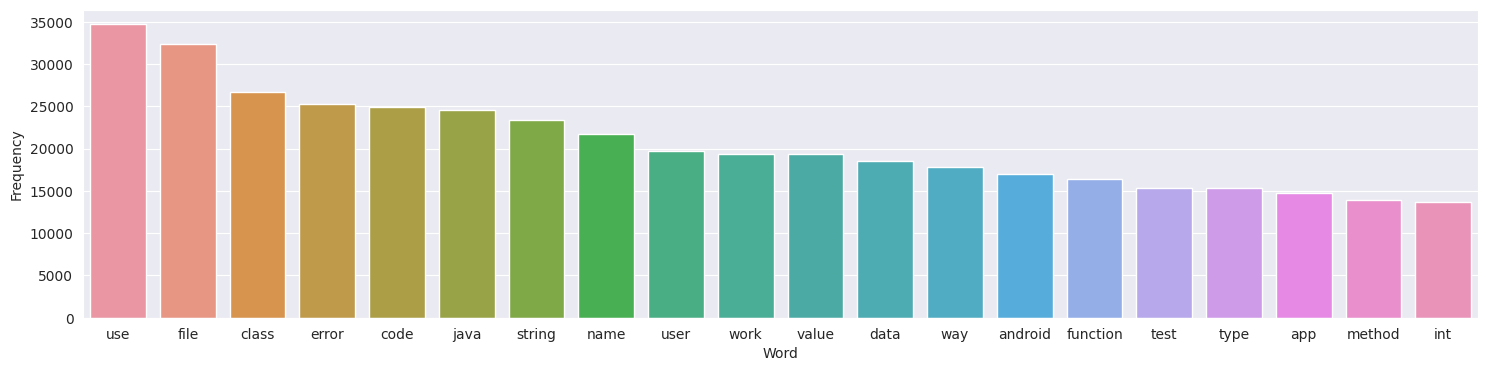

In [ ]:
fdist = nltk.FreqDist(corpus_copy)
words_corpus_df = pd.DataFrame({'Word':list(fdist.keys()), 'Frequency':list(fdist.values())})

# selecting top 20 most frequent words
df1 = words_corpus_df.nlargest(columns="Frequency", n=20)

# visualize words and frequencies

plt.figure(figsize=(18,4))
sns.set_style("darkgrid")
sns.barplot(x=df1['Word'], y=df1['Frequency'])

**Tracé des mots les plus fréquents dans les Tags**

Nombre de mots de total notre corpus tag : 218910
Nombre de mots unique de notre corpus tag : 14080


<Axes: xlabel='Word', ylabel='Frequency'>

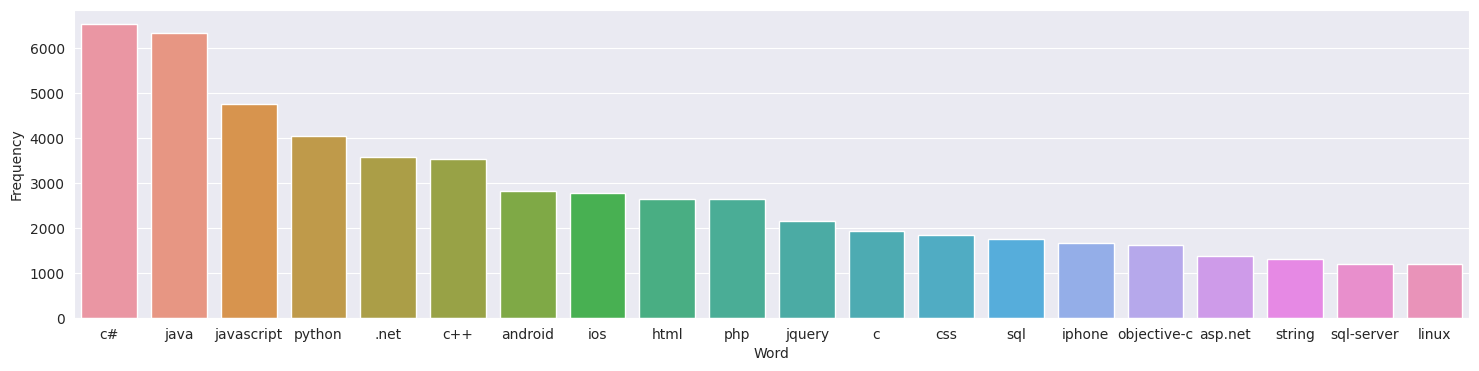

In [ ]:
#On contruit le corpus à partir de document_cleaned
corpus_tag =' '.join([text for text in data['Tags']])
corpus_tag_copy = corpus_tag.split()

print("Nombre de mots de total notre corpus tag :", len(corpus_tag_copy))
print("Nombre de mots unique de notre corpus tag :", len(set(corpus_tag_copy)))

fdist = nltk.FreqDist(corpus_tag_copy)
words_tags_df = pd.DataFrame({'Word':list(fdist.keys()), 'Frequency':list(fdist.values())})

# selecting top 20 most frequent words
df2 = words_tags_df.nlargest(columns="Frequency", n=20)

# visualize words and frequencies

plt.figure(figsize=(18,4))
sns.set_style("darkgrid")
sns.barplot(x=df2['Word'], y=df2['Frequency'])

In [ ]:
from wordcloud import WordCloud
def visualize_most_word(distribution, place):
    """
    It plots most popular word uses in corpus (title or body or corp) feature
    place = title or body or corp
    """
    fig = plt.figure(1, figsize=(12, 12))
    ax = fig.add_subplot(1, 1, 1)
    wordcloud = WordCloud(width=600, height=300,
                           max_words=100, relative_scaling=1,
                          normalize_plurals=False)\
    .generate_from_frequencies(distribution.set_index('Word').to_dict()['Frequency'])

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    plt.title("Word Cloud of 100 most popular words on {} feature\n".format(str(place)),
              fontsize=24)
    plt.show()

Les mots les plus fréquents dans title et body

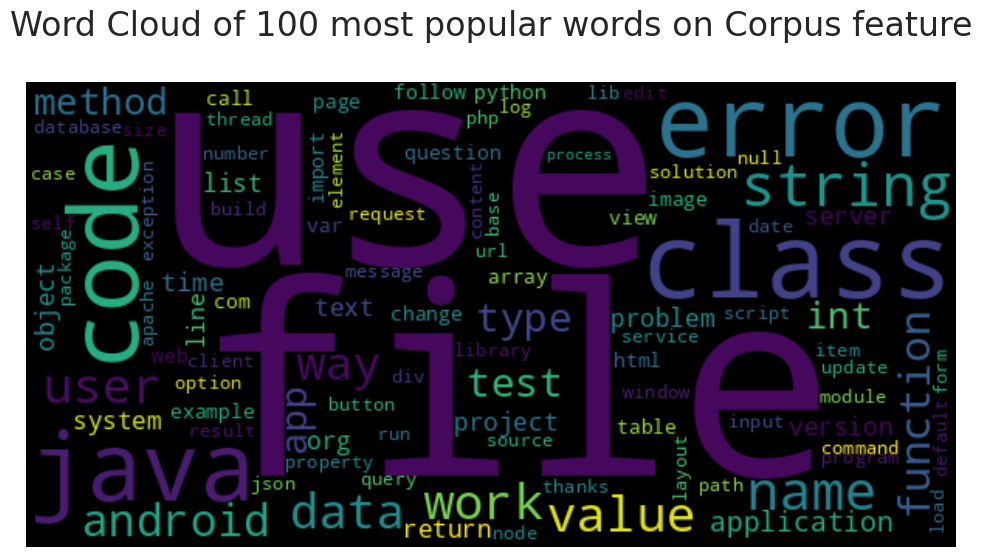

In [ ]:
visualize_most_word(words_corpus_df, 'Corpus')

Les tags les plus fréquents

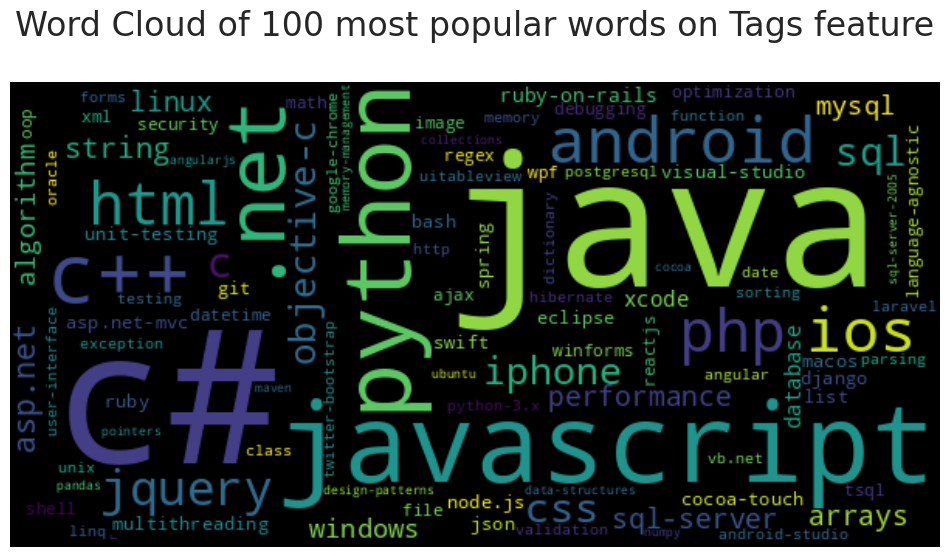

In [ ]:
visualize_most_word(words_tags_df , 'Tags')

Nous allons maintenant nous occuper des tokens rares dans notre corpus.

**List of rare tokens** (les tokens présents moins de 5 fois dans le corpus ne sont probablement pas utiles, un tokens rare sera sûrement exclus lors de la réduction de dimension)

Calcul de la fréquence des token dans le corpus

In [ ]:
words_corpus_df.nlargest(7, 'Frequency')

,Word,Frequency
31,use,34705
113,file,32434
111,class,26708
51,error,25289
65,code,24874
0,java,24566
2,string,23434


Distribution de la fréquence des tokens dans le corpus. On voit que le mot count a une fréquence d'apparition élevée dans le corpus.

In [ ]:
words_corpus_df.describe()

,Frequency
count,105015.000000
mean,29.465638
std,406.527912
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,34705.000000


Ici on affiche les tokens dont la fréquence d'apparition dans le corpus est très petite. On les supprimera du corpus.

In [ ]:
rare_tokens=words_corpus_df[words_corpus_df['Frequency']<5]
rare_tokens

,Word,Frequency
5,mull,4
49,callerfun,1
57,uikeyboardtaskqueue,2
104,rival,2
105,slickness,1
...,...,...
105010,getgoogleauth,1
105011,notreal,1
105012,flickrphotosearch,2
105013,flickrcontroller,1


In [ ]:
list_of_rare_tokens = list (rare_tokens['Word'])  # Transformer cette liste en dataframe (à voir)
print( len(rare_tokens), 'tokens', 'présents moins de 5 fois dans le corpus ')

80529 tokens présents moins de 5 fois dans le corpus 


Nous allons de ce qui suit conserver que les mots du corpus  et les tags qui apparaissent le plus souvent.

In [ ]:
def frequent_words(corpus, min_count):
    """
    This function removes rare tokens from a corpus.

    Args:
    - corpus (list): a list of strings, each representing a document or sentence
    - min_count (int): the minimum number of times a token must appear in the corpus to be kept

    Returns:
    - list: a list of tokens that appear at least min_count times in the corpus
    """
    all_words = [word for doc in corpus for word in doc.split()]
    fdist = nltk.FreqDist(all_words)
    freq_words = [word for word, count in fdist.items() if count >= min_count]
    return freq_words


Nous allons selectionné que les 50 meilleurs tags pour notre modlèle

In [50]:
Tags = [token.split(" ") for token in data['Tags']]
tags_more_frequent = frequent_words(data['Tags'],469)

print('Nombre de tags retenus :', len(set(tags_more_frequent)))

Nombre de tags retenus : 50


1. <ins>  conservation des 50 meilleurs tags et stockage dans la colonne **frequent_tags** </ins>

In [ ]:
data['temp'] = Tags
data['frequent_tags'] = data['temp'].apply(lambda x: ' '.join([tag for tag in x if tag in tags_more_frequent]))
del data['temp']

  Un aperçu des tags les plus fréquents

In [ ]:
X=data[['Tags', 'frequent_tags']]
X[['Tags', 'frequent_tags']].sample(10)

In [ ]:
document_cleaned = [token.split(" ") for token in data['document_cleaned']]

Dans le corpus on supprime les mots qui apparaissent moins de 100 fois

In [ ]:
word_in_document_more_frequent = frequent_words(data['document_cleaned'],100)
len(set(word_in_document_more_frequent))

2608

2. <ins>conservation des mots qui sont apparus plus de 100 fois dans le corpus et stockage dans la colonne 'frequent_word' </ins>

In [ ]:
data['temp'] = document_cleaned
data['frequent_word'] = data['temp'].apply(lambda x: ' '.join([word for word in x if word in word_in_document_more_frequent]))
del data['temp']

In [ ]:
#selection aléatoire que quelques lignes pour vérifier les effets de la selection effectuée.
data[['document_cleaned','frequent_word']].sample(10)

,document_cleaned,frequent_word
46997,project use yarn run follow command console wi...,project use yarn run follow command console wi...
32065,tsp way algorithms travel salesman problem cit...,way algorithms problem city wikipedia link lis...
26142,java lang classcastexception android text span...,java lang android text java lang string copy s...
41375,laravel decryptexception payload post request ...,laravel payload post request back laravel api ...
26379,swiftui xcode beta application ios uiscene def...,xcode beta application ios default app app lau...
46906,scheme lisp programming language syntax use li...,scheme lisp programming language syntax use sc...
41933,shim definition,definition
16165,cs selector rule end layout performance world ...,cs selector rule end layout performance world ...
17818,output window file studio studio output window...,output window file studio studio output window...
296,vba implementation isleapyear function vba edi...,vba implementation function vba edit implement...


In [ ]:
corpus =' '.join([text for text in data['document_cleaned']])
corpus_copy = corpus.split()



print("Nombre de mots de total notre corpus :", len(corpus_copy))
print("Nombre de mots unique de notre corpus :", len(set(corpus_copy)))

Nombre de mots de total notre corpus : 3094334
Nombre de mots unique de notre corpus : 105015


In [ ]:
corpus_filtered =' '.join([text for text in data['frequent_word']])
corpus_filtered_copy = corpus_filtered.split()


print("Nombre de mots de total notre corpus après conservation des mots les plus fréquents:", len(corpus_filtered_copy))
print("Nombre de mots unique de notre corpus après conservation des mots les plus fréquents:", len(set(corpus_filtered_copy)))

Nombre de mots de total notre corpus après conservation des mots les plus fréquents: 2600780
Nombre de mots unique de notre corpus après conservation des mots les plus fréquents: 2608


In [ ]:
data.head()

,Title,Body,Tags,Id,document,Body_cleaned,Title_cleaned,document_cleaned,frequent_tags,frequent_word
0,Is Java ArrayList / String / atomic variable r...,<p>I've been mulling this over &amp; reading b...,java synchronization multithreading arrayl...,2388808,Is Java ArrayList / String / atomic variable r...,mull read find absolute authoritative answer s...,java arraylist string atomic variable reading ...,java arraylist string reading thread mull read...,java multithreading,java arraylist string reading thread reading a...
1,GET vs. POST Best Practices,"<p>For my web application (PHP/MYSQL), I show ...",php html http forms rest,679013,GET vs. POST Best Practices <p>For my web appl...,web application php mysql show list item link ...,get post best practice,post practice web application php mysql show l...,php html,post practice web application php mysql show l...
2,How to mock a Kotlin singleton object?,<p>Given a Kotlin singleton object and a fun t...,mocking mockito kotlin powermock powermoc...,37977320,How to mock a Kotlin singleton object? <p>Give...,give kotlin singleton object fun call method o...,mock kotlin singleton object,kotlin singleton object kotlin singleton objec...,,kotlin singleton object kotlin singleton objec...
3,Error when dismissing view controller,<p>Getting an error when dismissing a view con...,ios objective-c xcode uiviewcontroller,20021107,Error when dismissing view controller <p>Getti...,get error dismiss view controller see anything...,error dismiss view controller,error view controller error view controller in...,ios objective-c xcode,error view controller error view controller in...
4,Google Maps: How to create a custom InfoWindow?,<p>The default Google Maps InfoWindow for a ma...,javascript html css google-maps,3860277,Google Maps: How to create a custom InfoWindow...,default google map infowindow map marker round...,google map create custom infowindow,google map custom infowindow default google ma...,javascript html css,google map custom default google map map marke...


Notre modélisation va se baser sur les colonnes **frequent_word** et **frequent_tags**

In [ ]:
# export the DataFrame to a CSV file
data.to_csv('gdrive/My Drive/Colab Notebooks/Ingenieur IA/Mission_4 Catégorisez automatiquement des questions/data_cleaned.csv', index=False)